In [2]:
from ultralytics import YOLO
import numpy as np
import pandas as pd
from PIL import Image

import os
import shutil
import pydicom
import cv2

from pydicom import dcmread

/Users/bvakhitov/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Convert dicom to PNG

In [2]:
diseases = ['Cardiomegaly', 'Lung Opacity', 'No finding']

for disease in diseases:
    inputdir = f'../dataset/detection/train/{disease}/'
    outputdir = '../all_data/train/images/'

    train_list = [f for f in  os.listdir(inputdir)]
    for f in train_list:   # remove "[:10]" to convert all images 
        print(inputdir + f)
        ds = dcmread(inputdir + f) # read dicom image
        img = ds.pixel_array # get image array
        cv2.imwrite(outputdir + f.replace('.dicom','.png'),img) # write png image

../dataset/detection/train/Cardiomegaly/2c475d89c90a50567ba0cf5ddd62f68a.dicom
../dataset/detection/train/Cardiomegaly/2728492d9333328da0ccd73d76d6c00d.dicom
../dataset/detection/train/Cardiomegaly/2a335bf71ad32a097557e379b6113ce9.dicom
../dataset/detection/train/Cardiomegaly/4d01d09027d1d1e0513de4c8b4fc20e1.dicom
../dataset/detection/train/Cardiomegaly/54d7976f3b2da92eafd691971f78ea2b.dicom
../dataset/detection/train/Cardiomegaly/5480af204701170956ce3d98f363a3c2.dicom


/Users/bvakhitov/Library/Python/3.9/lib/python/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


../dataset/detection/train/Cardiomegaly/13dbf07cb1c5273a89053346f7acf0f1.dicom
../dataset/detection/train/Cardiomegaly/1fcceea02142af619405d89b9ee156fc.dicom
../dataset/detection/train/Cardiomegaly/151893dad65d5077f5a377fc9d0e6881.dicom
../dataset/detection/train/Cardiomegaly/0e87195ff59d4294d61b8bffddb3c03c.dicom
../dataset/detection/train/Cardiomegaly/1516651227a420f879b4cea1500ee7db.dicom
../dataset/detection/train/Cardiomegaly/1c1ef26e3b3323f74041f6dd2371cd24.dicom
../dataset/detection/train/Cardiomegaly/15a71d5f1e9a0221e14cde0e0d1a2ccd.dicom
../dataset/detection/train/Cardiomegaly/09790cae0f405ce0fe4b003dadfc18c7.dicom
../dataset/detection/train/Cardiomegaly/26be9cde1a3d1a38f19c6753cc9ed40d.dicom
../dataset/detection/train/Cardiomegaly/1912296cce436028085697480121b4eb.dicom
../dataset/detection/train/Cardiomegaly/50f315c754b3530ac3c9bac3e96b22ac.dicom
../dataset/detection/train/Cardiomegaly/0622cd29e4e0e4f198abf15614819ae8.dicom
../dataset/detection/train/Cardiomegaly/5076848df8fa

/Users/bvakhitov/Library/Python/3.9/lib/python/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (14-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


../dataset/detection/train/Lung Opacity/32459f62247d44d5da83192aa03400e4.dicom
../dataset/detection/train/Lung Opacity/236c84dba2293e1afd669eee1b6511c6.dicom
../dataset/detection/train/Lung Opacity/17a43dc27cccda142f5d54d378f4aed7.dicom
../dataset/detection/train/Lung Opacity/0c577dc6594dab44ebbd6964de673eaa.dicom
../dataset/detection/train/Lung Opacity/54fa20d07ac42e467ab67a87cf8563a3.dicom
../dataset/detection/train/Lung Opacity/34c1f477c3cdd534ef53de3c832f1ac4.dicom
../dataset/detection/train/Lung Opacity/17381ffc2b43778487e782dbb5cb963a.dicom
../dataset/detection/train/Lung Opacity/13776ecb39222a7aaace2d9721abebbe.dicom
../dataset/detection/train/Lung Opacity/2534b21e1fcdf7748a07109999952840.dicom
../dataset/detection/train/Lung Opacity/3b464abb85ca7ca83a105e6057afab52.dicom
../dataset/detection/train/Lung Opacity/285c4b227a6c923d674fa58fdfdd2eca.dicom
../dataset/detection/train/Lung Opacity/5268b1ff61505e50ac05fd430cc45276.dicom
../dataset/detection/train/Lung Opacity/30d01b42c2a0

# Refactor labels to YOLO format

In [5]:
df = pd.read_csv('../dataset/detection/train/bbox.csv')

diseases = ['Cardiomegaly', 'Lung Opacity', 'No finding']

class_id = {
    'No finding': 0,
    'Lung Opacity': 1,
    'Cardiomegaly': 2
}

for disease in diseases:
    for filename in os.listdir(f'../dataset/detection/train/{disease}'):
        name = filename.split('.')[0]
        small_df = df[df['image_id'] == name]

        sample = small_df[small_df['class_name'] == disease].iloc[0]
        shape = np.array(Image.open(f'../all_data/train/images/{name}.png')).shape

        with open(f'../all_data/train/labels/{name}.txt', 'w') as file:
            if class_id[disease] == 0:
                file.write(f'{class_id[disease]} {0.0} {0.0} {0.0} {0.0}')
            else:
                x_min = sample.x_min / shape[0]
                x_max = sample.x_max / shape[0]
                y_min = sample.y_min / shape[1]
                y_max = sample.y_max / shape[1]

                x_center = (x_max + x_min) / 2
                y_center = (y_max + y_min) / 2
                
                width = x_max - x_min
                height = y_max - y_min

                file.write(f'{class_id[disease]} {x_center} {y_center} {width} {height}')

# Load model and train

In [6]:
model = YOLO('yolo11n.pt')  # загрузка модели

In [7]:
model.train(data = '../data.yaml', epochs = 150, device='mps', val=False, close_mosaic=0, batch=32)

New https://pypi.org/project/ultralytics/8.3.28 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.27 🚀 Python-3.9.6 torch-2.5.1 MPS (Apple M3 Pro)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=../data.yaml, epochs=150, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=False, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_c

train: Scanning /Users/bvakhitov/vscode/spbu/lungs-pathology-detection/all_data/train/labels.cache... 145 images, 0 backgrounds, 0 corr
val: Scanning /Users/bvakhitov/vscode/spbu/lungs-pathology-detection/all_data/train/labels.cache... 145 images, 0 backgrounds, 0 corrup


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train10
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      8.89G      1.661      3.862      1.983         47        640: 100%|██████████| 5/5 [00:30<00:00,  6.03s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150       8.9G      1.181      3.464      1.626         38        640: 100%|██████████| 5/5 [00:07<00:00,  1.58s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      8.92G      1.235      3.284      1.647         42        640: 100%|██████████| 5/5 [00:08<00:00,  1.62s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      8.92G       1.27      3.182      1.656         39        640: 100%|██████████| 5/5 [00:08<00:00,  1.67s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      8.93G      1.194      2.964      1.599         41        640: 100%|██████████| 5/5 [00:08<00:00,  1.64s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      8.95G      1.092      2.625      1.527         39        640: 100%|██████████| 5/5 [00:08<00:00,  1.72s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      8.95G      1.073      2.537      1.504         45        640: 100%|██████████| 5/5 [00:09<00:00,  1.84s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      8.98G      1.025      2.496      1.476         39        640: 100%|██████████| 5/5 [00:08<00:00,  1.77s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      8.98G      1.016      2.358      1.483         38        640: 100%|██████████| 5/5 [00:08<00:00,  1.75s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      8.98G       1.06        2.4      1.506         25        640: 100%|██████████| 5/5 [00:09<00:00,  1.97s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      9.14G      1.129      2.407      1.531         40        640: 100%|██████████| 5/5 [00:09<00:00,  1.87s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      9.01G      1.119        2.4      1.518         36        640: 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      9.01G      0.978      2.184      1.445         43        640: 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      9.02G      1.203      2.516      1.583         36        640: 100%|██████████| 5/5 [00:08<00:00,  1.74s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      9.03G      1.072      2.322      1.498         36        640: 100%|██████████| 5/5 [00:14<00:00,  2.88s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      9.04G      1.035      2.177      1.495         46        640: 100%|██████████| 5/5 [00:15<00:00,  3.09s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      9.07G      1.088      2.277      1.487         41        640: 100%|██████████| 5/5 [00:17<00:00,  3.57s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      9.07G      1.092      2.237      1.481         38        640: 100%|██████████| 5/5 [00:11<00:00,  2.37s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      9.08G      1.093      2.203      1.482         38        640: 100%|██████████| 5/5 [00:11<00:00,  2.30s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150       9.1G      1.047      2.125      1.476         39        640: 100%|██████████| 5/5 [00:10<00:00,  2.09s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      9.09G      1.031      2.099      1.468         42        640: 100%|██████████| 5/5 [00:12<00:00,  2.45s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150       9.1G     0.9225      1.911      1.396         40        640: 100%|██████████| 5/5 [00:10<00:00,  2.18s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      9.12G      1.143      2.193      1.533         34        640: 100%|██████████| 5/5 [00:12<00:00,  2.53s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      9.11G      1.079      2.134      1.505         38        640: 100%|██████████| 5/5 [00:15<00:00,  3.11s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      9.13G      1.142      2.159       1.54         35        640: 100%|██████████| 5/5 [00:14<00:00,  2.87s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      9.14G      1.007      1.907      1.437         45        640: 100%|██████████| 5/5 [00:12<00:00,  2.54s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      9.16G      1.047       1.99      1.466         34        640: 100%|██████████| 5/5 [00:13<00:00,  2.61s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      9.15G      1.074      2.012      1.486         42        640: 100%|██████████| 5/5 [00:12<00:00,  2.56s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      9.18G      0.953      1.786      1.406         43        640: 100%|██████████| 5/5 [00:14<00:00,  2.91s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      9.18G     0.9732      1.853      1.415         38        640: 100%|██████████| 5/5 [00:12<00:00,  2.46s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      9.29G      1.095      2.065      1.503         36        640: 100%|██████████| 5/5 [00:11<00:00,  2.23s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      9.19G      1.047      2.007      1.511         35        640: 100%|██████████| 5/5 [00:13<00:00,  2.65s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      9.22G     0.9884      1.851      1.466         43        640: 100%|██████████| 5/5 [00:12<00:00,  2.43s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      9.21G      1.106      2.004      1.521         37        640: 100%|██████████| 5/5 [00:10<00:00,  2.17s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      9.22G      1.024      1.786       1.47         47        640: 100%|██████████| 5/5 [00:16<00:00,  3.30s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      9.24G      1.086      1.912      1.504         37        640: 100%|██████████| 5/5 [00:10<00:00,  2.11s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      9.24G     0.9863      1.776       1.46         30        640: 100%|██████████| 5/5 [00:14<00:00,  3.00s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      9.25G       1.09      1.822      1.506         32        640: 100%|██████████| 5/5 [00:12<00:00,  2.52s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      9.27G     0.9239      1.731      1.419         30        640: 100%|██████████| 5/5 [00:14<00:00,  2.83s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      9.27G     0.9223      1.774      1.414         40        640: 100%|██████████| 5/5 [00:13<00:00,  2.74s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      9.27G     0.9126      1.659      1.376         37        640: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150       9.3G     0.9072      1.563      1.378         39        640: 100%|██████████| 5/5 [00:17<00:00,  3.41s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150       9.3G     0.9761      1.618      1.442         48        640: 100%|██████████| 5/5 [00:23<00:00,  4.60s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      9.31G     0.9219      1.615      1.411         34        640: 100%|██████████| 5/5 [00:14<00:00,  2.98s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      9.32G     0.9283      1.653      1.408         37        640: 100%|██████████| 5/5 [00:16<00:00,  3.23s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      9.32G     0.8076       1.48      1.336         45        640: 100%|██████████| 5/5 [00:20<00:00,  4.00s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      9.35G      0.911       1.69      1.399         36        640: 100%|██████████| 5/5 [00:18<00:00,  3.79s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      9.36G     0.9466      1.668      1.444         31        640: 100%|██████████| 5/5 [00:14<00:00,  2.99s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      9.36G     0.8132      1.543      1.361         34        640: 100%|██████████| 5/5 [00:16<00:00,  3.36s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      9.38G     0.8867      1.567      1.387         39        640: 100%|██████████| 5/5 [00:17<00:00,  3.52s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      9.38G      1.024      1.813      1.471         43        640: 100%|██████████| 5/5 [00:17<00:00,  3.52s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      9.39G      0.915      1.601      1.377         41        640: 100%|██████████| 5/5 [00:14<00:00,  2.91s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150       9.4G     0.9071      1.698      1.381         35        640: 100%|██████████| 5/5 [00:16<00:00,  3.35s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      9.41G      0.859      1.544      1.325         44        640: 100%|██████████| 5/5 [00:18<00:00,  3.62s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      9.42G     0.7337      1.391      1.279         42        640: 100%|██████████| 5/5 [00:18<00:00,  3.67s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      9.43G     0.8032      1.446      1.356         36        640: 100%|██████████| 5/5 [00:16<00:00,  3.31s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      9.44G     0.7908      1.407      1.326         45        640: 100%|██████████| 5/5 [00:15<00:00,  3.09s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      9.44G     0.8601      1.483      1.376         37        640: 100%|██████████| 5/5 [00:21<00:00,  4.35s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      9.46G     0.8025      1.395       1.31         37        640: 100%|██████████| 5/5 [00:19<00:00,  3.91s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      9.48G     0.7477      1.352      1.259         39        640: 100%|██████████| 5/5 [00:19<00:00,  3.90s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      9.49G     0.9247      1.541      1.387         37        640: 100%|██████████| 5/5 [00:16<00:00,  3.26s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      9.51G     0.9413      1.583      1.389         39        640: 100%|██████████| 5/5 [00:15<00:00,  3.14s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      9.49G     0.8453      1.404      1.349         45        640: 100%|██████████| 5/5 [00:21<00:00,  4.36s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      9.52G     0.8258      1.466      1.351         36        640: 100%|██████████| 5/5 [00:20<00:00,  4.17s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      9.52G     0.8164      1.351      1.316         41        640: 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      9.53G     0.7919      1.349      1.326         33        640: 100%|██████████| 5/5 [00:18<00:00,  3.70s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      9.54G     0.7422      1.305      1.283         38        640: 100%|██████████| 5/5 [00:15<00:00,  3.05s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      9.54G      0.726      1.301      1.288         43        640: 100%|██████████| 5/5 [00:19<00:00,  3.98s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      9.56G     0.8179      1.363      1.326         38        640: 100%|██████████| 5/5 [00:18<00:00,  3.78s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      9.57G     0.7518       1.37      1.285         36        640: 100%|██████████| 5/5 [00:17<00:00,  3.52s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      9.58G     0.7725      1.284      1.318         27        640: 100%|██████████| 5/5 [00:19<00:00,  3.85s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      9.58G     0.7692      1.287      1.298         39        640: 100%|██████████| 5/5 [00:14<00:00,  2.96s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      9.58G     0.7544      1.275      1.282         35        640: 100%|██████████| 5/5 [00:23<00:00,  4.74s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150       9.6G     0.7735      1.304      1.301         32        640: 100%|██████████| 5/5 [00:17<00:00,  3.54s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      9.63G     0.7166      1.244      1.267         40        640: 100%|██████████| 5/5 [00:14<00:00,  2.92s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      9.61G     0.7905      1.219      1.287         41        640: 100%|██████████| 5/5 [00:19<00:00,  3.86s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      9.64G     0.7372      1.236      1.288         30        640: 100%|██████████| 5/5 [00:17<00:00,  3.55s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      9.65G     0.8027      1.298       1.31         37        640: 100%|██████████| 5/5 [00:15<00:00,  3.06s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      9.66G     0.6989      1.181      1.221         34        640: 100%|██████████| 5/5 [00:17<00:00,  3.43s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      9.66G     0.7726      1.336      1.317         38        640: 100%|██████████| 5/5 [00:16<00:00,  3.38s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      9.68G     0.7761      1.252      1.309         35        640: 100%|██████████| 5/5 [00:16<00:00,  3.32s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      9.68G     0.8177      1.321      1.312         43        640: 100%|██████████| 5/5 [00:17<00:00,  3.54s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150       9.7G     0.6831      1.152      1.265         38        640: 100%|██████████| 5/5 [00:18<00:00,  3.75s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      9.71G     0.6722      1.121      1.244         44        640: 100%|██████████| 5/5 [00:18<00:00,  3.65s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      9.72G     0.7478      1.203      1.309         35        640: 100%|██████████| 5/5 [00:18<00:00,  3.62s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      9.71G     0.7834      1.238      1.304         36        640: 100%|██████████| 5/5 [00:22<00:00,  4.44s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      9.73G     0.7335       1.19       1.28         31        640: 100%|██████████| 5/5 [00:20<00:00,  4.20s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      9.76G     0.7493      1.196      1.271         38        640: 100%|██████████| 5/5 [00:19<00:00,  3.81s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      9.76G     0.6802      1.137      1.219         38        640: 100%|██████████| 5/5 [00:18<00:00,  3.66s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      9.76G     0.7208       1.19      1.243         31        640: 100%|██████████| 5/5 [00:17<00:00,  3.57s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      9.78G     0.6653      1.076      1.231         38        640: 100%|██████████| 5/5 [00:15<00:00,  3.00s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      9.79G     0.7071      1.163      1.239         32        640: 100%|██████████| 5/5 [00:17<00:00,  3.58s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150       9.8G     0.7254      1.124      1.243         41        640: 100%|██████████| 5/5 [00:17<00:00,  3.56s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      9.79G     0.7106      1.074      1.252         37        640: 100%|██████████| 5/5 [00:18<00:00,  3.72s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150       9.8G     0.6978      1.116      1.254         37        640: 100%|██████████| 5/5 [00:18<00:00,  3.69s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      9.83G     0.6329      1.039      1.202         46        640: 100%|██████████| 5/5 [00:21<00:00,  4.36s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      9.85G      0.682      1.061      1.244         40        640: 100%|██████████| 5/5 [00:17<00:00,  3.50s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      9.84G     0.6696      1.058      1.231         38        640: 100%|██████████| 5/5 [00:18<00:00,  3.61s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      9.85G     0.6393      1.034      1.209         31        640: 100%|██████████| 5/5 [00:18<00:00,  3.67s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      9.85G     0.6244      0.984      1.211         39        640: 100%|██████████| 5/5 [00:18<00:00,  3.78s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      9.87G     0.6766      1.028      1.239         42        640: 100%|██████████| 5/5 [00:21<00:00,  4.39s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      9.75G     0.7212      1.113      1.259         24        640: 100%|██████████| 5/5 [00:27<00:00,  5.54s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      9.88G     0.7346      1.047      1.269         43        640: 100%|██████████| 5/5 [00:20<00:00,  4.13s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      9.79G       0.68       1.05      1.214         35        640: 100%|██████████| 5/5 [00:21<00:00,  4.38s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      9.91G     0.6618      1.052        1.2         42        640: 100%|██████████| 5/5 [00:20<00:00,  4.02s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      9.92G     0.6556     0.9943      1.198         32        640: 100%|██████████| 5/5 [00:19<00:00,  3.82s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      9.82G     0.6173     0.9271      1.195         49        640: 100%|██████████| 5/5 [00:22<00:00,  4.49s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      9.95G     0.6755      1.001      1.234         36        640: 100%|██████████| 5/5 [00:26<00:00,  5.28s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      9.95G     0.6334     0.9874      1.227         33        640: 100%|██████████| 5/5 [00:19<00:00,  3.97s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      9.97G     0.6493       1.09      1.226         32        640: 100%|██████████| 5/5 [00:21<00:00,  4.40s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      9.99G     0.6092     0.9192      1.196         44        640: 100%|██████████| 5/5 [00:20<00:00,  4.03s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      9.98G      0.682     0.9523       1.22         38        640: 100%|██████████| 5/5 [00:20<00:00,  4.04s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      9.88G     0.5639     0.9339      1.182         35        640: 100%|██████████| 5/5 [00:27<00:00,  5.60s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      9.89G     0.6847     0.9578      1.177         42        640: 100%|██████████| 5/5 [00:27<00:00,  5.55s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150        10G     0.6448     0.9067      1.202         43        640: 100%|██████████| 5/5 [00:22<00:00,  4.58s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150        10G     0.6949      1.031      1.231         37        640: 100%|██████████| 5/5 [00:18<00:00,  3.68s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150        10G      0.613     0.8821      1.188         42        640: 100%|██████████| 5/5 [00:21<00:00,  4.22s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150        10G     0.6194     0.8973      1.192         38        640: 100%|██████████| 5/5 [00:22<00:00,  4.49s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      10.1G     0.6002     0.8849      1.153         38        640: 100%|██████████| 5/5 [00:23<00:00,  4.68s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      9.97G     0.5732     0.8665      1.144         48        640: 100%|██████████| 5/5 [00:25<00:00,  5.09s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      10.1G     0.6017     0.8484      1.148         34        640: 100%|██████████| 5/5 [00:20<00:00,  4.00s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      10.1G     0.5632     0.8664      1.161         30        640: 100%|██████████| 5/5 [00:17<00:00,  3.52s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      9.99G     0.6184     0.9231      1.202         45        640: 100%|██████████| 5/5 [00:26<00:00,  5.29s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      10.1G     0.6064     0.9182      1.194         46        640: 100%|██████████| 5/5 [00:21<00:00,  4.37s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      10.1G     0.5752     0.8007      1.167         31        640: 100%|██████████| 5/5 [00:21<00:00,  4.28s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      10.1G       0.63     0.8711      1.191         33        640: 100%|██████████| 5/5 [00:19<00:00,  3.88s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      10.1G     0.6001     0.8168       1.18         35        640: 100%|██████████| 5/5 [00:27<00:00,  5.50s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      10.2G     0.6347     0.9538      1.206         37        640: 100%|██████████| 5/5 [00:24<00:00,  4.96s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      10.2G      0.601     0.8436      1.176         32        640: 100%|██████████| 5/5 [00:20<00:00,  4.01s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      10.2G     0.5909     0.8158      1.128         37        640: 100%|██████████| 5/5 [00:26<00:00,  5.24s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      10.1G     0.5618     0.8699      1.166         32        640: 100%|██████████| 5/5 [00:28<00:00,  5.67s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      10.2G     0.6016     0.8399      1.183         42        640: 100%|██████████| 5/5 [00:26<00:00,  5.26s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      10.2G     0.6626     0.9025      1.193         41        640: 100%|██████████| 5/5 [00:19<00:00,  3.98s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      10.2G     0.6523     0.9121      1.183         32        640: 100%|██████████| 5/5 [00:23<00:00,  4.77s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      10.2G     0.5917     0.8473      1.191         36        640: 100%|██████████| 5/5 [00:29<00:00,  5.82s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      10.2G     0.5606     0.7846      1.124         40        640: 100%|██████████| 5/5 [00:20<00:00,  4.15s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      10.3G     0.5717     0.7804      1.164         41        640: 100%|██████████| 5/5 [00:26<00:00,  5.27s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      10.3G     0.5804     0.8376      1.171         34        640: 100%|██████████| 5/5 [00:21<00:00,  4.25s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      10.3G     0.5841     0.8562      1.166         32        640: 100%|██████████| 5/5 [00:22<00:00,  4.50s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      10.2G     0.5108     0.7556       1.12         35        640: 100%|██████████| 5/5 [00:26<00:00,  5.30s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      10.3G     0.5923     0.8272      1.169         41        640: 100%|██████████| 5/5 [00:24<00:00,  4.82s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      10.2G     0.5594     0.8038      1.151         40        640: 100%|██████████| 5/5 [00:22<00:00,  4.53s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      10.3G     0.5689     0.8001      1.138         38        640: 100%|██████████| 5/5 [00:23<00:00,  4.63s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      10.2G      0.561     0.7928      1.136         34        640: 100%|██████████| 5/5 [00:26<00:00,  5.31s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      10.4G     0.4702     0.7471      1.105         31        640: 100%|██████████| 5/5 [00:18<00:00,  3.77s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      10.4G     0.5459     0.7338      1.141         36        640: 100%|██████████| 5/5 [00:22<00:00,  4.49s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      10.4G     0.5371     0.7696       1.12         37        640: 100%|██████████| 5/5 [00:19<00:00,  3.83s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      10.4G     0.5066     0.6851      1.121         40        640: 100%|██████████| 5/5 [00:29<00:00,  5.95s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      10.4G     0.5687     0.7767      1.133         44        640: 100%|██████████| 5/5 [00:22<00:00,  4.42s/it]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      10.4G     0.4937     0.6868      1.116         37        640: 100%|██████████| 5/5 [00:20<00:00,  4.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [01:08<02:17, 68.68s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [02:27<01:14, 74.39s/it]

WARNING ⚠️ NMS time limit 2.850s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [03:15<00:00, 65.27s/it]


                   all        145        145      0.593     0.0269     0.0554     0.0444

150 epochs completed in 0.979 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 5.5MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.9.6 torch-2.5.1 MPS (Apple M3 Pro)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:26<00:53, 26.51s/it]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 2/3 [00:55<00:28, 28.23s/it]

WARNING ⚠️ NMS time limit 2.850s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [01:12<00:00, 24.13s/it]


                   all        145        145      0.554     0.0746     0.0989     0.0856
            No finding         50         50      0.859        0.1      0.141      0.141
          Lung Opacity         46         46      0.373     0.0217     0.0385     0.0264
          Cardiomegaly         49         49      0.431      0.102      0.117     0.0889
Speed: 1.6ms preprocess, 138.6ms inference, 0.0ms loss, 106.2ms postprocess per image
Results saved to runs/detect/train10


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x329d6d040>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# Run inference

In [8]:
infer = YOLO("runs/detect/train10/weights/best.pt") # загружаем лучшие обученные веса

In [9]:
# проверяем результат обучения
output = infer.predict('../all_data/train/images/', save = True, save_txt = True)


image 1/145 /Users/bvakhitov/vscode/spbu/lungs-pathology-detection/notebooks/../all_data/train/images/0005e8e3701dfb1dd93d53e2ff537b6e.png: 640x640 1 Lung Opacity, 57.2ms
image 2/145 /Users/bvakhitov/vscode/spbu/lungs-pathology-detection/notebooks/../all_data/train/images/004d2bc2111d639f5e8441ced52d55cb.png: 640x544 1 No finding, 1 Cardiomegaly, 35.2ms
image 3/145 /Users/bvakhitov/vscode/spbu/lungs-pathology-detection/notebooks/../all_data/train/images/00dc70e84d141255f7fc6f8038bdd72e.png: 640x544 1 No finding, 33.0ms
image 4/145 /Users/bvakhitov/vscode/spbu/lungs-pathology-detection/notebooks/../all_data/train/images/012969950fbdd28bb50cfa447877cd4e.png: 640x544 1 No finding, 40.7ms
image 5/145 /Users/bvakhitov/vscode/spbu/lungs-pathology-detection/notebooks/../all_data/train/images/018a2fe44c3451281ec338c27ecc9c53.png: 640x576 1 Lung Opacity, 34.2ms
image 6/145 /Users/bvakhitov/vscode/spbu/lungs-pathology-detection/notebooks/../all_data/train/images/0459d43804df005b79d9b248690cf777

In [10]:
import matplotlib.pyplot as plt

def display_image_with_boxes(image, boxes):
    # Create an Annotator instance
    annotator = Annotator(image)

    id2class = {
        0: 'No finding',
        1: 'Lung Opacity',
        2: 'Cardiomegaly'
    }
    
    # Annotate the image with bounding boxes
    for box in boxes:
        class_id, x1, y1, x2, y2 = box
        annotator.box_label((x1, y1, x2, y2), label=id2class[class_id], color=(255, 0, 0))  # Customize color and label
    
    # Get the annotated image
    annotated_image = annotator.result()
    
    # Plotting using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.show()

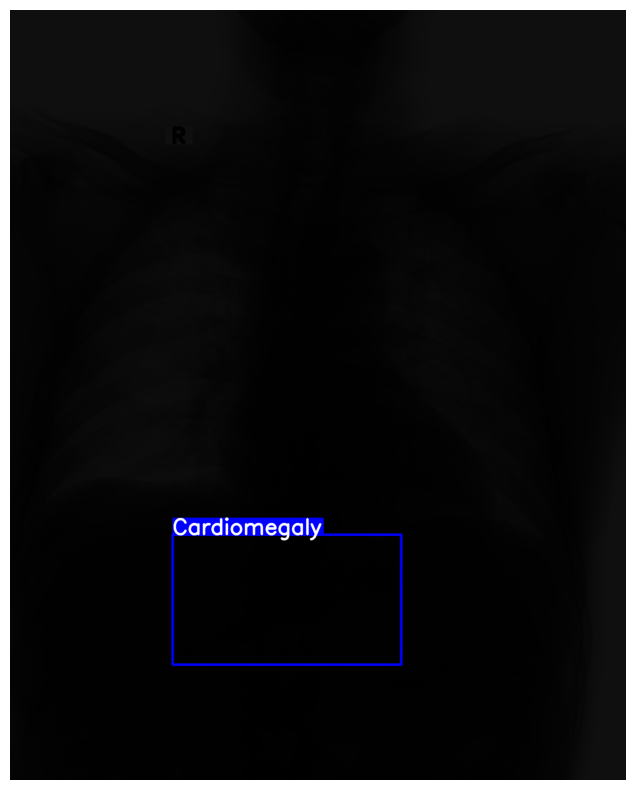

In [11]:
import cv2
import os
from ultralytics.utils.plotting import Annotator

# take random image and corresponding label
label_path = '../all_data/train/labels/1c1ef26e3b3323f74041f6dd2371cd24.txt'
img_path = '../all_data/train/images/1c1ef26e3b3323f74041f6dd2371cd24.png'
image = cv2.imread(img_path)

# Read bounding boxes from label file
boxes = []
with open(label_path, 'r') as file:
    for line in file.readlines():
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        # Convert YOLO format to pixel coordinates (x1, y1, x2, y2)
        x1 = int((x_center - width / 2) * image.shape[1])
        y1 = int((y_center - height / 2) * image.shape[0])
        x2 = int((x_center + width / 2) * image.shape[1])
        y2 = int((y_center + height / 2) * image.shape[0])
        boxes.append((class_id, x1, y1, x2, y2))

display_image_with_boxes(image, boxes)

In [13]:
from PIL import Image

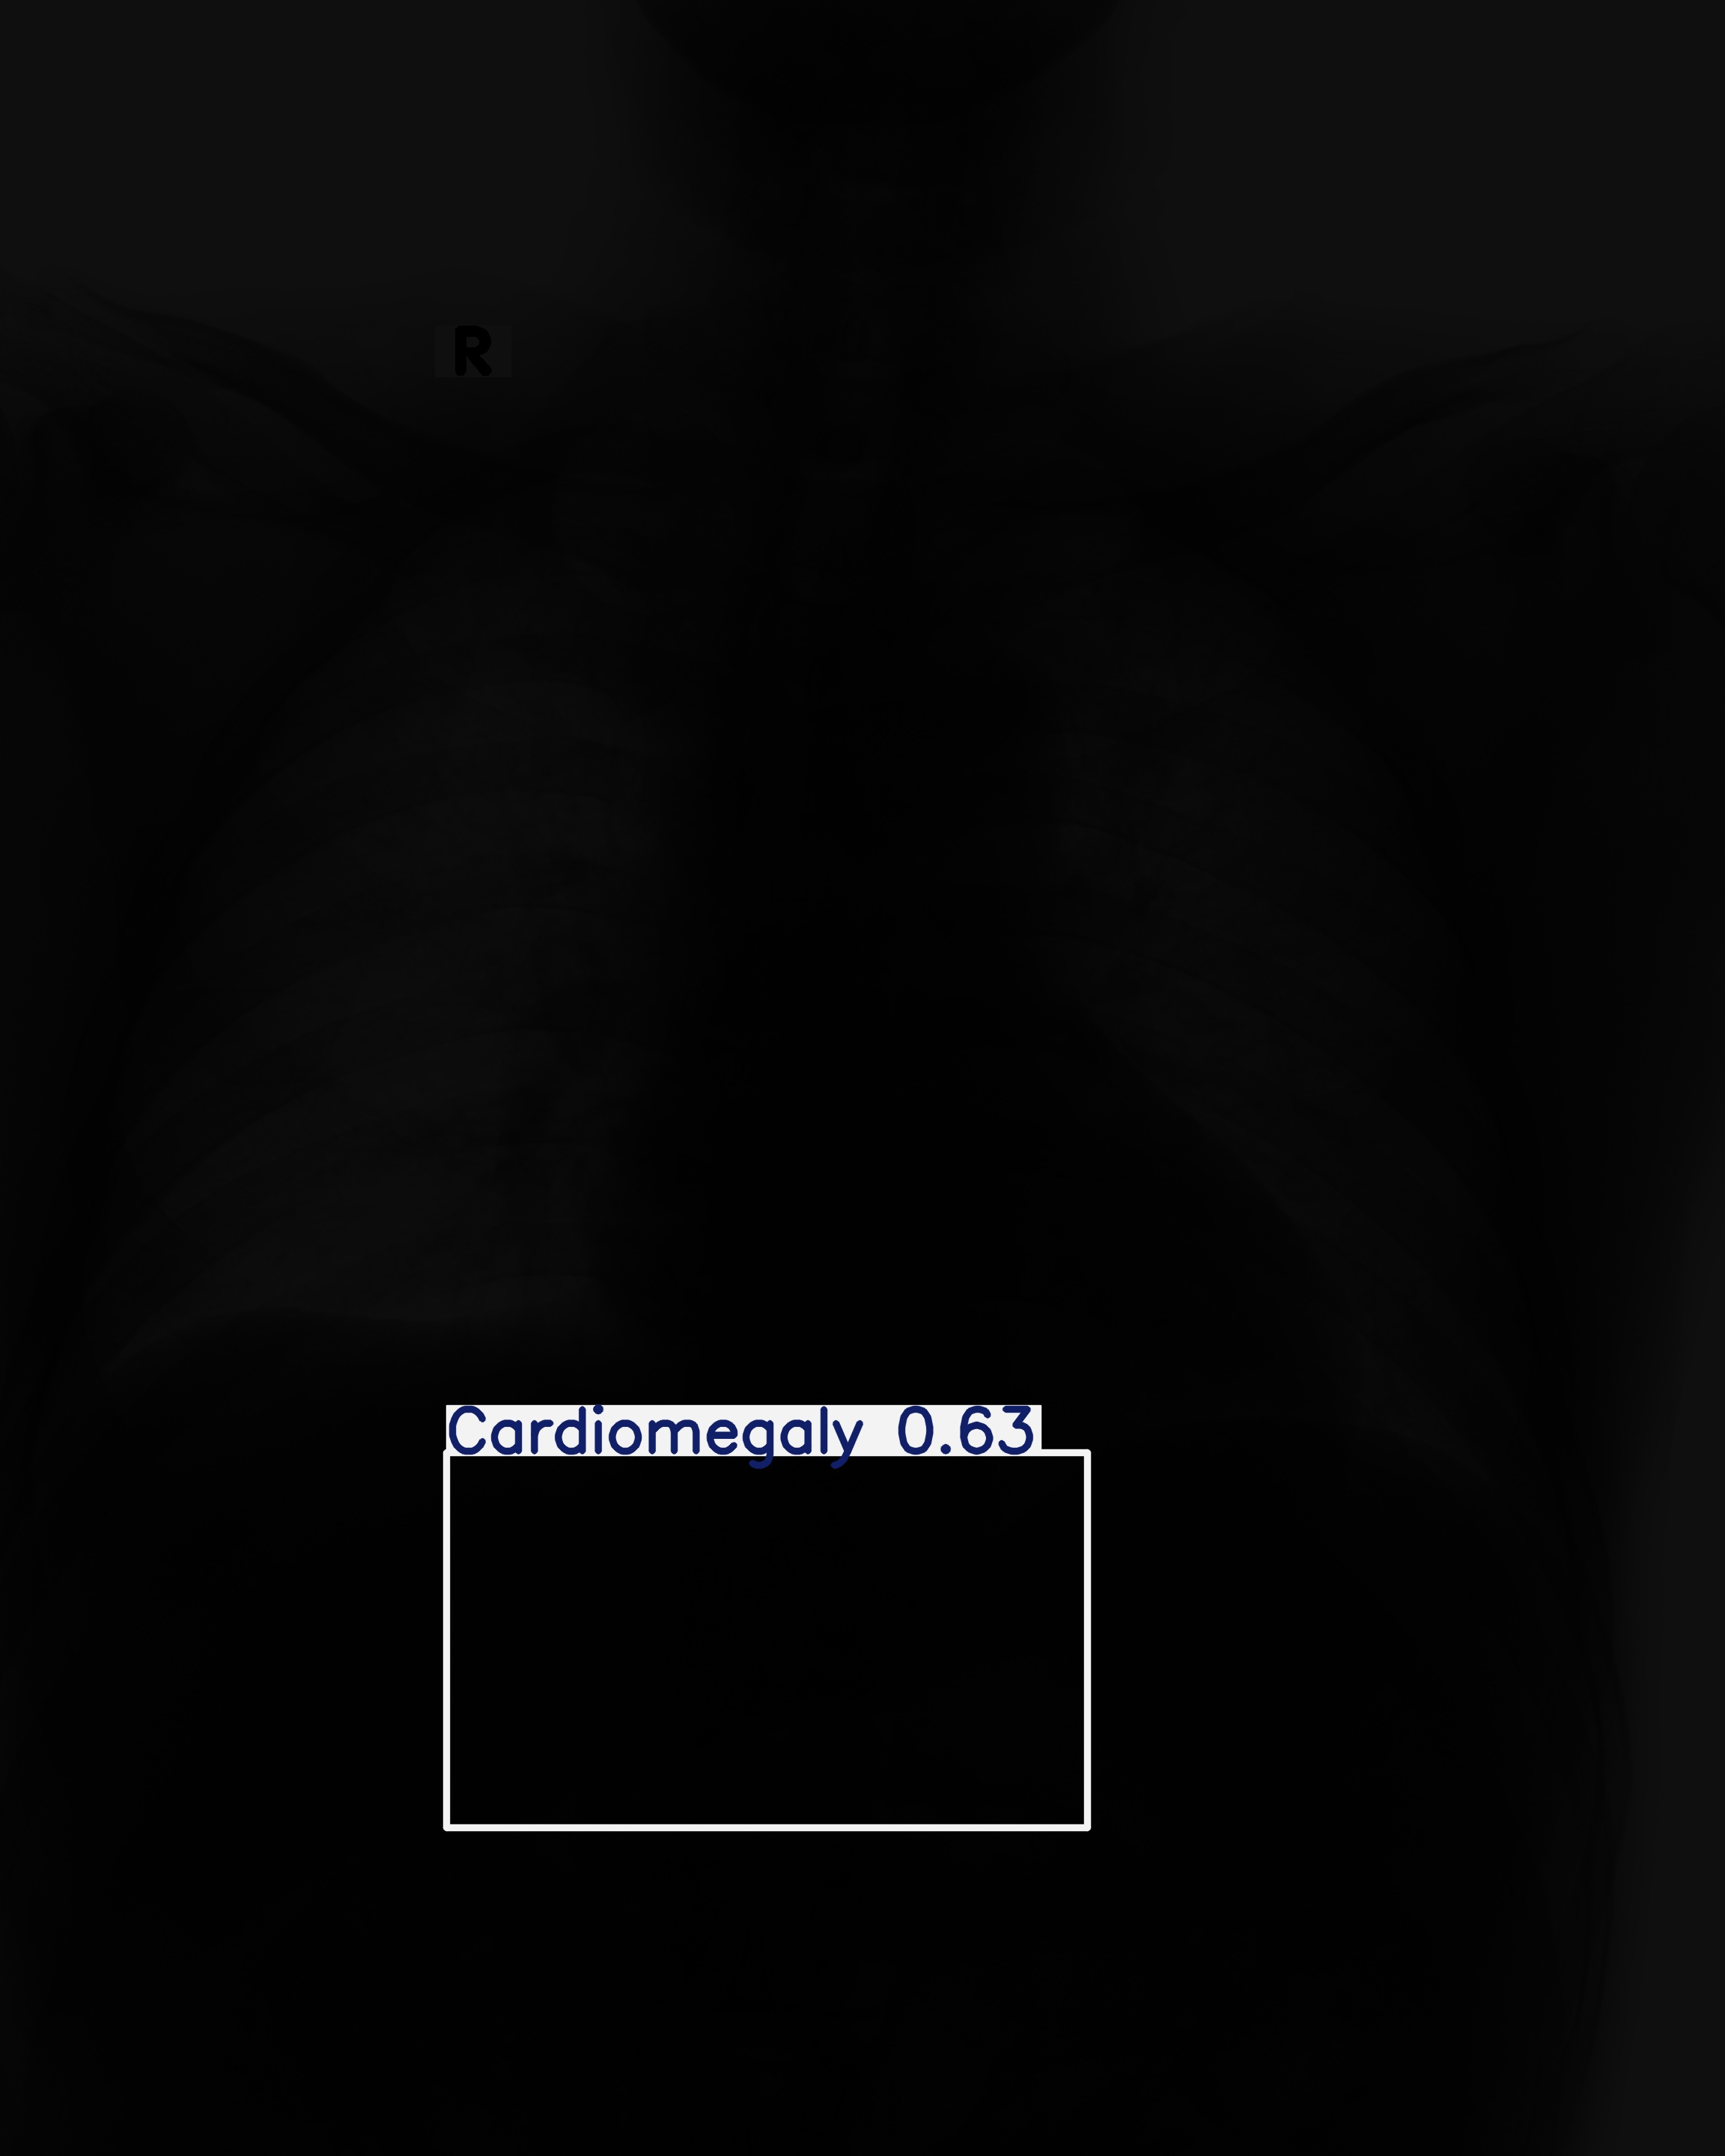

In [15]:
Image.open('runs/detect/predict4/1c1ef26e3b3323f74041f6dd2371cd24.jpg')